# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gcn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
# YOUR CODE HERE!

from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("news_api_key")

In [3]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

BTC_news = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

#BTC_news["articles"]

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ETH_news = newsapi.get_everything(
    q="Ethereum",
    language="en"
)
ETH_news["totalResults"]

4688

In [6]:
def get_sentiment(articles):
    try:
        sentiments = []
        for article in articles:
            content = article["content"]
            results = analyzer.polarity_scores(content)
            compound = results["compound"]
            positive = results["pos"]
            neutral = results["neu"]
            negative = results["neg"]
            sentiments.append({'text':content,'compound': compound, 'positive':positive, 'neutral':neutral, 'negative':negative})
        Dataframe=pd.DataFrame(sentiments)
    except AttributeError:
        pass
    return Dataframe    

In [7]:
btc_sent = get_sentiment(BTC_news['articles'])

In [8]:
eth_sent = get_sentiment(ETH_news['articles'])

In [9]:
btc_sent.head()

,text,compound,positive,neutral,negative
0,"Now, even though there are a number of women-f...",0.0772,0.036,0.964,0.000
1,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.882,0.061
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.772,0.143
3,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.928,0.000
4,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.807,0.000


In [10]:
eth_sent.head()

,text,compound,positive,neutral,negative
0,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.681,0.231
1,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.865,0.000
2,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.812,0.000
3,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.879,0.075
4,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.945,0.055


In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_sent.describe()

,compound,positive,neutral,negative
count,20.000000,20.00000,20.000000,20.000000
mean,-0.004405,0.06560,0.871300,0.063100
std,0.400008,0.06937,0.094377,0.059805
min,-0.549900,0.00000,0.557000,0.000000
25%,-0.335475,0.00000,0.844250,0.000000
50%,-0.114750,0.04900,0.894000,0.063000
75%,0.254725,0.08500,0.930250,0.077000
max,0.750600,0.20200,0.964000,0.241000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_sent.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.000000,20.000000
mean,-0.072195,0.049800,0.885400,0.064850
std,0.478793,0.065599,0.076021,0.072435
min,-0.784500,0.000000,0.681000,0.000000
25%,-0.381800,0.000000,0.849000,0.000000
50%,-0.249750,0.000000,0.921000,0.063000
75%,0.303775,0.080500,0.937000,0.077000
max,0.735100,0.188000,1.000000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [17]:
# Complete the tokenizer function
#def tokenizer(text):
   # """Tokenizes text."""
    
def process_text(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

    # Remove the punctuation from text

   
    # Create a tokenized list of the words
    
    
    # Lemmatize words into root words

   
    # Convert the words to lowercase
    
    
    # Remove the stop words
    
    #return tokens

In [18]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc_sent['output']=btc_sent.text.apply(process_text)
btc_sent
#.append()

,text,compound,positive,neutral,negative,output
0,"Now, even though there are a number of women-f...",0.0772,0.036,0.964,0.000,"[even, though, number, womenfocused, crypto, s..."
1,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.882,0.061,"[bitcoin, mining, site, powered, otherwise, lo..."
2,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.772,0.143,"[warren, buffett, ha, always, bitcoin, skeptic..."
3,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.928,0.000,"[image, source, getty, imagesthe, value, bitco..."
4,If youve ever felt like introducing some Vegas...,0.7506,0.193,0.807,0.000,"[youve, ever, felt, like, introducing, vegasst..."
5,Cryptocurrency mixers are sometimes used to he...,-0.4404,0.202,0.557,0.241,"[cryptocurrency, mixer, sometimes, used, help,..."
6,April 26 (Reuters) - Bitcoin dropped 5.1% to $...,-0.2732,0.000,0.937,0.063,"[april, reuters, bitcoin, dropped, tuesday, pr..."
7,"May 4 (Reuters) - Bitcoin rose 5.7% to $39,862...",-0.2732,0.000,0.937,0.063,"[may, reuters, bitcoin, rose, wednesday, addin..."
8,Posted \r\nFrom Bitcoin's dramatic drop to a n...,-0.3612,0.000,0.877,0.123,"[posted, bitcoins, dramatic, drop, new, way, p..."
9,"May 11 (Reuters) - Bitcoin fell 7.23% to $28,7...",-0.3818,0.000,0.923,0.077,"[may, reuters, bitcoin, fell, gmt, wednesday, ..."


In [19]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth_sent['output']=eth_sent.text.apply(process_text)
eth_sent

,text,compound,positive,neutral,negative,output
0,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.681,0.231,"[us, department, treasury, say, lazarus, behin..."
1,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.865,0.000,"[meta, ha, revealed, nfts, work, instagram, us..."
2,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.812,0.000,"[opera, launched, dedicated, crypto, browser, ..."
3,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.879,0.075,"[multibillion, dollar, cryptocurrency, company..."
4,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.945,0.055,"[bored, ape, yacht, club, creator, yuga, labs,..."
5,April 26 (Reuters) - Ether has promised to do ...,0.5346,0.142,0.858,0.000,"[april, reuters, ether, ha, promised, better, ..."
6,Ethereum is preparing for an upgrade thats bee...,0.2716,0.065,0.935,0.000,"[ethereum, preparing, upgrade, thats, describe..."
7,Dogecoiners unite! Movie theater chain AMC has...,0.4003,0.078,0.922,0.000,"[dogecoiners, unite, movie, theater, chain, am..."
8,There's a new metaverse project from the creat...,-0.2732,0.000,0.937,0.063,"[theres, new, metaverse, project, creator, bor..."
9,Editorial IndependenceWe want to help you make...,0.6908,0.178,0.822,0.000,"[editorial, independencewe, want, help, make, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

def word_counter(btc_sent): 
    # Combine all articles in corpus into one large string
    #big_string = ' '.join(btc_sent)
    processed = process_text(btc_sent.text.str.cat())
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

word_counter(btc_sent)

,bigram,count
0,"(reuters, bitcoin)",5
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(charsmay, reuters)",3
7,"(world, largest)",2
8,"(bitcoin, dropped)",2
9,"(cryptocurrency, year)",2


In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
word_counter(eth_sent)

,bigram,count
0,"(reuters, bitcoin)",4
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(charsmay, reuters)",3
7,"(yacht, club)",2
8,"(charsapril, reuters)",2
9,"(ha, promised)",2


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
#token_count(BTC_News)

In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

def word_cloud(text):
    wc = WordCloud().generate(text)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

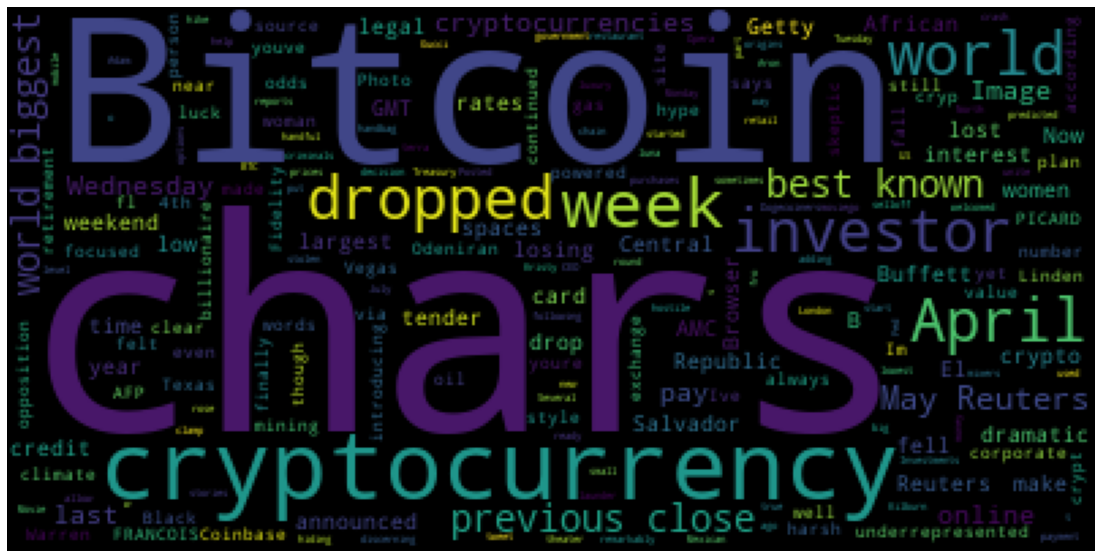

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
word_cloud(btc_sent.text.str.cat())

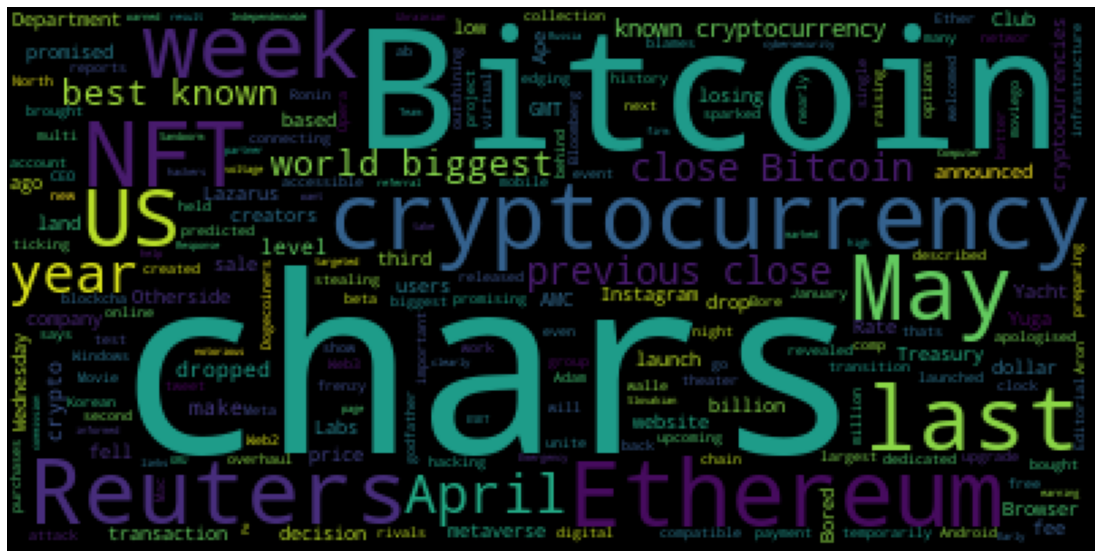

In [29]:
word_cloud(eth_sent.text.str.cat())

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [30]:
import spacy
from spacy import displacy

In [31]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.2 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Users/gcn/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [50]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

#btc_j = btc_sent['output']
#btc_j


btc_jt = btc_sent.text.str.cat()
btc_jt



'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\nBlock and Blockstream, a … [+1336 chars]Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]If youve ever felt like introducing some Vegas-style odds into your retirement plan, youre finally in luck.\r\nLast week, Fidelity 

In [55]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(btc_jt)
doc.user_data["title"] = "Bitcoin Mining"

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style='ent', jupyter=True)

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [67]:
# List all Entities
# YOUR CODE HERE!
ent_list = []
text_lab = []
for entity in doc.ents:
    text_lab.append(entity.text)
    text_lab.append(entity.label_)
    ent_list.append(text_lab)
    print(text_lab)
    text_lab = []


['Linden', 'GPE']
['Texas', 'GPE']
['April 4th, 2022', 'DATE']
['Photo', 'PERSON']
['FRANCOIS PICARD/AFP', 'ORG']
['Getty Images', 'ORG']
['later this year', 'DATE']
['Verge', 'PRODUCT']
['Vox', 'ORG']
['Alex Castro', 'PERSON']
['Blockstream', 'ORG']
["the Wikimedia Foundation's", 'ORG']
['Ars Technica', 'PERSON']
['GorillaWarfare', 'ORG']
['Buffett', 'PERSON']
['the weekend', 'DATE']
['Last week', 'DATE']
['Fidelity Investments', 'ORG']
['the US Treasury', 'ORG']
['chars]April 12', 'DATE']
['Reuters', 'ORG']
['$10 billion', 'MONEY']
['Block', 'GPE']
['Jack Dorsey', 'PERSON']
['three', 'CARDINAL']
['Thursday', 'DATE']
['CoinDesk', 'PRODUCT']
['Cash App', 'PERSON']
['15', 'CARDINAL']
['More than 200', 'CARDINAL']
['Wikipedia', 'ORG']
['the Wikimedia Foundation', 'ORG']
['+4016 chars]April 26', 'ORG']
['Reuters', 'ORG']
['5.1%', 'PERCENT']
['38,391.36', 'MONEY']
['Tuesday', 'DATE']
['2,229.82', 'MONEY']
['16%', 'PERCENT']
['year', 'DATE']
['+339 chars]May 4', 'ORG']
['Reuters', 'ORG']
['

---

### Ethereum NER

In [1]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

eth_jt = eth_sent.text.str.cat()
eth_jt



NameError: name 'eth_sent' is not defined

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

doc2 = nlp(eth_jt)
doc2.user_data["title"] = "ETH Mining"

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc2, style='ent', jupyter=True)

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!
ent_list = []
text_lab = []
for entity in doc2.ents:
    text_lab.append(entity.text)
    text_lab.append(entity.label_)
    ent_list.append(text_lab)
    print(text_lab)
    text_lab = []

---